# Exploratory data analysis (EDA)
## Dataset Loading and Pre-processing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Loading Dataset


In [7]:
# Step 1: Load the dataset
df = pd.read_csv("C:/Users/Pc/Desktop/Global trends in 2023.csv",encoding='ISO-8859-1')


## Check the First Five Rows

In [8]:
# Check the first few rows of the dataset
print(df.head())


   No.                    News         People         Passings  \
0    1  War in Israel and Gaza   Damar Hamlin    Matthew Perry   
1    2       Titanic submarine  Jeremy Renner      Tina Turner   
2    3       Turkey earthquake    Andrew Tate  Sinéad O'Connor   
3    4        Hurricane Hilary  Kylian Mbappé        Ken Block   
4    5        Hurricane Idalia   Travis Kelce   Jerry Springer   

                          Actors       Athletes                       Games  \
0                  Jeremy Renner   Damar Hamlin             Hogwarts Legacy   
1                   Jenna Ortega  Kylian Mbappé              The Last of Us   
2  ?? ??? (Ichikawa Ennosuke IV)   Travis Kelce                 Connections   
3                Danny Masterson      Ja Morant  Battlegrounds Mobile India   
4                   Pedro Pascal     Harry Kane                   Starfield   

                 Movies         Musicians           Recipe  \
0                Barbie           Shakira         Bibimbap   
1   

## Check for Missing Values

In [9]:
print("Missing values before handling:\n", df.isnull().sum())


Missing values before handling:
 No.               0
News              0
People            0
Passings          0
Actors            0
Athletes          0
Games             0
Movies            0
Musicians         0
Recipe            0
Songs             0
Sports Teams      0
TV Shows          0
Top Songs         0
Top Parks         0
Top Stadiums      0
Top Museums       0
Top Categories    0
Top Apparel       0
Unitprice         0
dtype: int64


## Handle Missing Values

In [10]:
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

## One-Hot Encoding for Categorical Columns

In [11]:
df = pd.get_dummies(df, columns=['News'], drop_first=True)

## Check for Duplicates

In [12]:
print(f"Duplicate rows before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Duplicate rows before dropping: 0




*   duplicated().sum(): Counts duplicate rows
*   drop_duplicates(): Removes duplicate rows

## Exploratory Data Analysis


In [14]:
print("Dataset summary:\n", df.describe())


Dataset summary:
             No.  Unitprice  News_Hurricane Hilary  News_Hurricane Idalia  \
count  10.00000  10.000000              10.000000              10.000000   
mean    5.50000   3.530000               0.100000               0.100000   
std     3.02765   1.334208               0.316228               0.316228   
min     1.00000   2.200000               0.000000               0.000000   
25%     3.25000   2.650000               0.000000               0.000000   
50%     5.50000   3.350000               0.000000               0.000000   
75%     7.75000   3.775000               0.000000               0.000000   
max    10.00000   6.800000               1.000000               1.000000   

       News_Hurricane Lee  News_Maine shooting  News_Nashville shooting  \
count           10.000000            10.000000                10.000000   
mean             0.100000             0.100000                 0.100000   
std              0.316228             0.316228                 0.316228 



*   describe(): Summarizes numerical columns, showing count, mean, min, max, and quartiles.



## Normalize or Scale Numerical Data


In [15]:
# Step 1: Identify numerical columns
numerical_columns = df.select_dtypes(include='number').columns
print("Numerical columns to scale:", numerical_columns)

# Step 2: Apply standardization (Z-score scaling)
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 3: Check the transformed dataset
print("First few rows of the normalized dataset:\n", df.head())


Numerical columns to scale: Index(['No.', 'Unitprice', 'News_Hurricane Hilary', 'News_Hurricane Idalia',
       'News_Hurricane Lee', 'News_Maine shooting', 'News_Nashville shooting',
       'News_Titanic submarine', 'News_Turkey earthquake',
       'News_War in Israel and Gaza', 'News_War in Sudan'],
      dtype='object')
First few rows of the normalized dataset:
         No.         People         Passings                         Actors  \
0 -1.566699   Damar Hamlin    Matthew Perry                  Jeremy Renner   
1 -1.218544  Jeremy Renner      Tina Turner                   Jenna Ortega   
2 -0.870388    Andrew Tate  Sinéad O'Connor  ?? ??? (Ichikawa Ennosuke IV)   
3 -0.522233  Kylian Mbappé        Ken Block                Danny Masterson   
4 -0.174078   Travis Kelce   Jerry Springer                   Pedro Pascal   

        Athletes                       Games                Movies  \
0   Damar Hamlin             Hogwarts Legacy                Barbie   
1  Kylian Mbappé       

## Visualizing Data

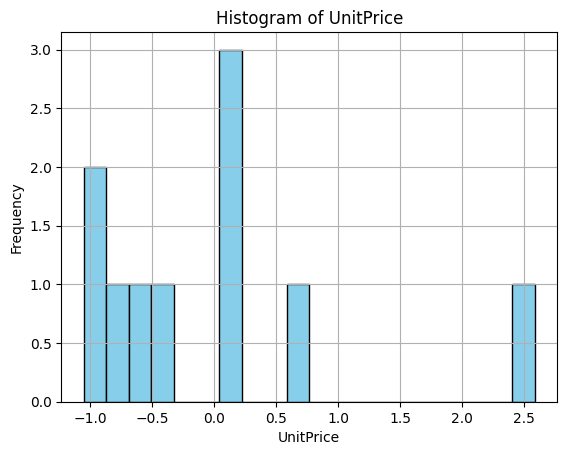

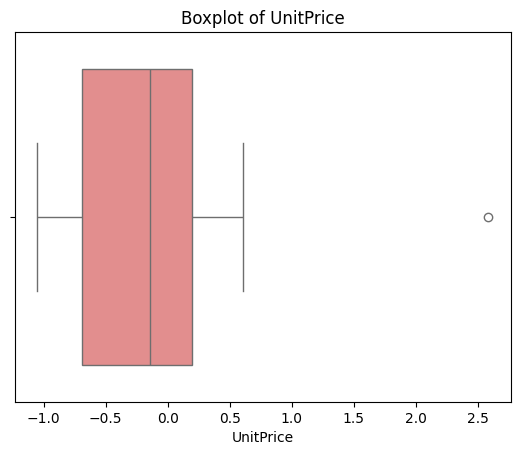

In [30]:
# Visualize the 'Unitprice' column
df['Unitprice'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of UnitPrice")
plt.xlabel("UnitPrice")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(x=df['Unitprice'], color='lightcoral')
plt.title("Boxplot of UnitPrice")
plt.xlabel("UnitPrice")
plt.show()